In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X = dataset.drop('target',axis=1)
y = dataset['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=10)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
print(confusion_matrix(y_test,y_pred))

[[136   4]
 [  4 133]]


In [12]:
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       140
           1       0.97      0.97      0.97       137

    accuracy                           0.97       277
   macro avg       0.97      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277

Accuracy =  0.9711191335740073


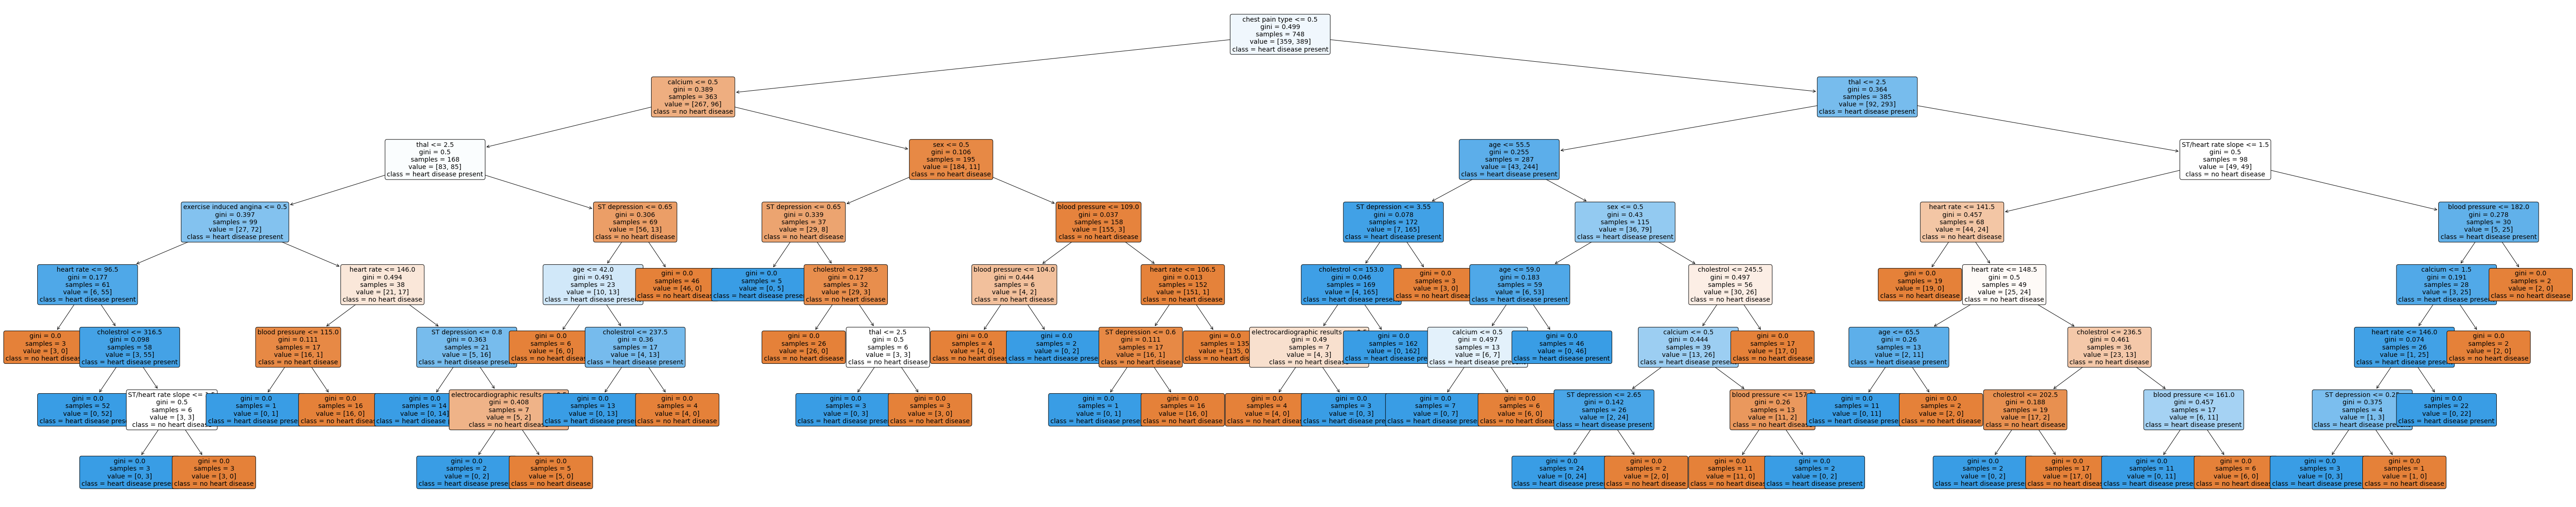

In [29]:
from sklearn.tree import plot_tree

X_labels = ['age','sex','chest pain type','blood pressure','cholestrol','blood sugar','electrocardiographic results','heart rate','exercise induced angina','ST depression','ST/heart rate slope','calcium','thal']
classes = ['no heart disease','heart disease present']
plt.figure(figsize=(100,20))
a = plot_tree(classifier, 
              feature_names=X_labels, 
              class_names=classes, 
              filled=True, 
              rounded=True, 
              fontsize=14)